# Lesson 4: Logistic Regression
Motivation: Users should understand the process of logistic regression, and understand how we can make models of things using mathematical techniques

High Level Goal: start understanding what problems can be solved through machine learning. (Hint: prediction vs classification)

Logistic regression is a fundamental technique in statistics and machine learning used for classification problems. It helps us predict the probability of a particular outcome based on one or more input features. Unlike linear regression, which predicts continuous values, logistic regression is used when the outcome is categorical, especially binary outcomes (like yes/no, true/false, or 0/1).

Here’s a simple way to think about it: imagine you have a bunch of data points, and you want to decide if each point belongs to one category or another. For instance, you might want to predict if an email is spam or not spam based on features like the number of links it contains or the frequency of certain words.

In logistic regression, we use a function called the logistic function, or sigmoid function, to convert the output of our model into a probability. The sigmoid function looks like an S-curve and outputs values between 0 and 1. This is perfect for our needs, as we can interpret these values as probabilities. If the probability is above a certain threshold (often 0.5), we classify the outcome as one category; otherwise, we classify it as the other.

The process involves fitting a model to your data by estimating coefficients for each feature. These coefficients determine the weight of each feature in making the classification. The logistic regression algorithm adjusts these weights to best fit the data, using methods like maximum likelihood estimation.

To illustrate this, lets go over an example. Imagine you are working with a dataset from a university that includes information about applicants and whether they were admitted or not. You want to predict whether a new applicant will be admitted based on their high school GPA. (I apologize if this brings back any unnecessary stress from high school.) This is a classic binary classification problem: the outcome is either “admitted” (1) or “not admitted” (0).

First, Let's discuss the libraries we will use. We will introduce a new library called pandas. This will allow us to easily classify the data. The rest of the imported libraries are standard ones that we are familiar with.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from importlib import reload
import pandas as pd
plt=reload(plt)

Now, we will generate the data. We will also visualize it fully and carefully.

Let's first take some time to understand the data. Note how the y values can only be either 1 or 0. This is the direct result of binary classification, where there are two possible categories that the data can fit in.

We also can observe that the data is quite spread out. However, take time to note the position of the points here. We will be observing these in great detail, as well as using them to judge the algorithms performance.

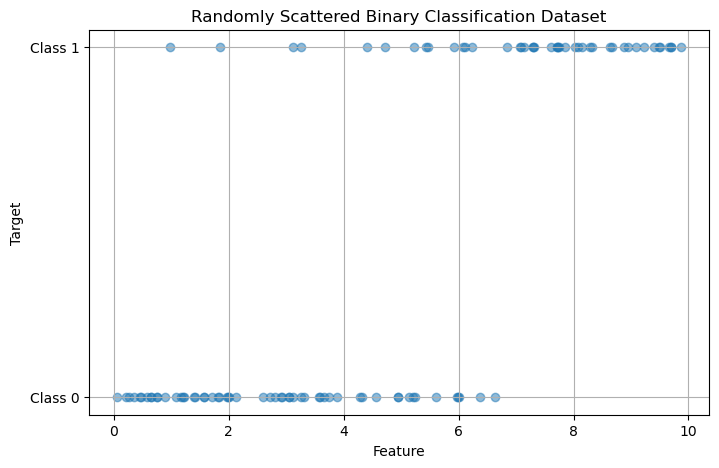

In [2]:
# Set a random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
num_samples = 100  # Total number of samples
x = np.random.rand(num_samples) * 10  # Feature values between 0 and 10
x_vals = np.linspace(0,10,100)

# Introduce randomness for the target variable
# Randomly assign binary values based on a condition
y = (x + np.random.normal(0, 2, num_samples) > 5).astype(int)  # Adding noise

# Create a DataFrame
data = pd.DataFrame({'Feature': x, 'Target': y})

# Save the dataset to a CSV file
# data.to_csv('binary_classification_scattered_dataset.csv', index=False)

# Optional: Visualize the dataset
plt.figure(figsize=(8, 5))
plt.scatter(data['Feature'], data['Target'], alpha=0.5)
plt.title('Randomly Scattered Binary Classification Dataset')
plt.xlabel('Feature')
plt.ylabel('Target')
plt.yticks([0, 1], ['Class 0', 'Class 1'])
plt.grid()
plt.show()


Now, we will discuss the Sigmoid curve. This is a very powerful function that allows us to essentially model binary classification by manipulating only a few values. 

The formula for the s curve is: 
    $$
        g(z) = \frac{1}{1+e^{-z}}
    $$

Let's take some time and analyze this. If we input really small values for z into this equation, we will observe that the output will be approximately 1. Meanwhile, when we input very large values, g goes to approximately 0. Now, this curve is continuous - meaning it will have decimal values, not just 1 and 0. However, we can essentially threshold this, saying that if any value on the sigmoid curve is below some threshold, it is classified as a 0; otherwise, it is a 1.

Where this function gets interesting is we can express z as a function - namely, the linear function:
    $$
        g = \frac{1}{1+e^{-(w * x + b)}}
    $$

This should look familiar - it is used in linear regression! What is even more awesome is that we can essentially use the same process for optimization in linear regression here. Recall that gradient descent simply tells the algorithm which way it should adjust parameters, and by how much. We don't have to obsess over the fact that the dynamics of the function are different now - the logic will still apply directly!

In [3]:
def sigmoid(x,weight,bias):
    output = 1 / (1 + np.exp(-1 * (weight * x + bias)))
    return output

Well, this sigmoid function is great - but what about the loss function? Here, we have specified a function that characterizes behaviors. It is called the log-likelihood function. It is defined as follows:
    $$loss(f_{\mathbf{w},b}(\mathbf{x}^{(i)}), y^{(i)}) = (-y^{(i)} \log\left(f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) - \left( 1 - y^{(i)}\right) \log \left( 1 - f_{\mathbf{w},b}\left( \mathbf{x}^{(i)} \right) \right) \tag{2}$$
It looks complicated, and definitely intimidating. However, we will take some time to walk through this. Understanding this loss function ends up being quite intuitive!

Let's first take some time to recall what loss really is. An algorithm uses loss by calculating its magnitude for each trial, and then adjusting the weights and biases in the opposite direction that the loss points. This is an interesting task when we are trying to classify the data. Due to the nature of this problem, we can no longer apply MSE (mean square error) to this. MSE is specifically useful when we are trying to *predict* data, not classify it. We need a function that can actually calculate a loss according to the classification problem.

Enter: log-likelihood. This function uses the true data, as well as the predicted values from the algorithm in the form of a linear function. (NOTE: this linear function is the direct input for the Sigmoid function!) This indicates that this algorithm is a *supervised* learning algorithm.

Now, the actual function.The first thing that needs attention is the y term there. Notice that inside the summation, there are two terms that use y: one where you directly multiply y, and the other where you subtract y from 1. This is actually how the classification process happens within the loss function. Remember that y can only be 0 and 1. When y is 1, the first term will be the only one that matters, and when it is 0, the second term is the only one that matters.

Now, onto the first part with the log function. Why do we take the log of a value here? Well, logs allow us to quantify losses well, especially if they end up being very large. We definitely want this - if there are a lot of datapoints, and the prediction is terribly off, we don't want the algorithm to make adjustments in such a way that it will jump past the ideal mark entirely. Using a log helps this happen.

Interestingly enough, the same application is there with the other log function. We can take solace in the fact that just the fact that these two functions look the same means that their purpose is quite similar. However, note that the application will be different - one is going to be used only when the prediction is 1, and the other when the prediction is 0.

In [4]:
def log_likelihood(y,x,weight,bias):
    loss = -y * np.log(sigmoid(weight * x + bias)) - (1 - y)*np.log(1 - sigmoid(weight * x + bias)))
    return loss

Now, let's initialize some weights. We will pick some pretty arbitrary values for the weight and bias.

In [5]:
w = 8
b = 20
loss_1 = 0

Now, let's perform gradient descent on this algorithm. We will do this with various number of iterations, and observe the performance.

nan


C:\Users\ethan\AppData\Local\Temp\ipykernel_8812\666676124.py:2: RuntimeWarning: invalid value encountered in log
  loss = -y * np.log(weight * x + bias) - (1 - y)*np.log(1 - weight*x + bias)


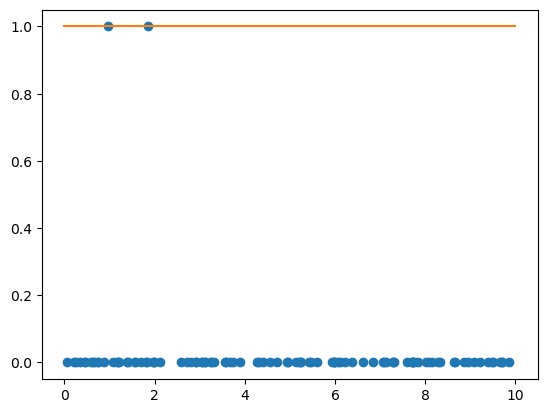

In [6]:
dw = np.sum(x * (sigmoid(x,w,b) - y)) / 200
w = w - 0.02 * dw

db = np.sum((sigmoid(x,w,b) - y)) / 200
b = b - 0.02 * db
loss_1 = np.sum(log_likelihood(y,x,w,b))

res_1 = (y>sigmoid(x,w,b)) * y

plt.plot(x, res_1,'o',x_vals, sigmoid(x_vals,w,b))
print(loss_1)

And now, we will repeat this process over and over again many times, as per gradient descent. 

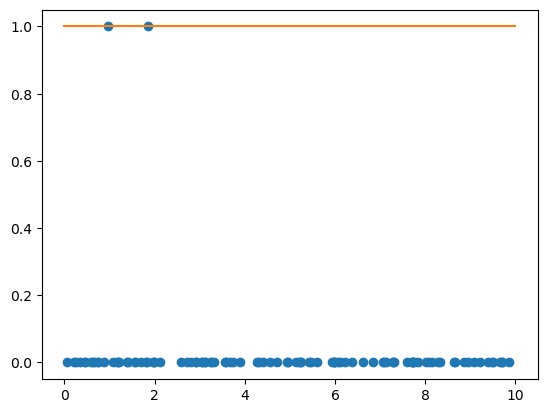

In [7]:
for epoch in range(0,100):
    dw = np.sum(x * (sigmoid(x,w,b) - y)) / 200
    w = w - 0.02 * dw

    db = np.sum((sigmoid(x,w,b) - y)) / 200
    b = b - 0.02 * db

res_1 = (y>sigmoid(x,w,b)) * y

plt.plot(x, res_1,'o',x_vals, sigmoid(x_vals,w,b))

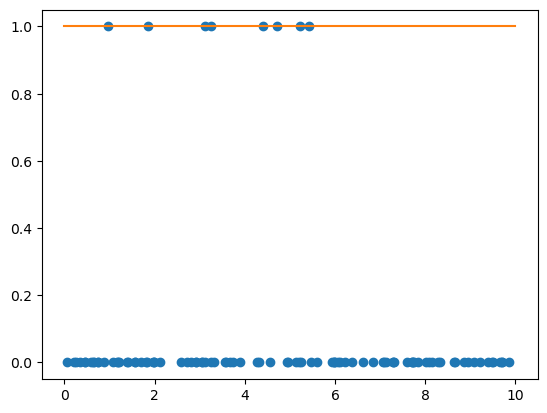

In [8]:
for epoch in range(0,200):
    dw = np.sum(x * (sigmoid(x,w,b) - y)) / 200
    w = w - 0.02 * dw

    db = np.sum((sigmoid(x,w,b) - y)) / 200
    b = b - 0.02 * db

res_1 = (y>sigmoid(x,w,b)) * y

plt.plot(x, res_1,'o',x_vals, sigmoid(x_vals,w,b))

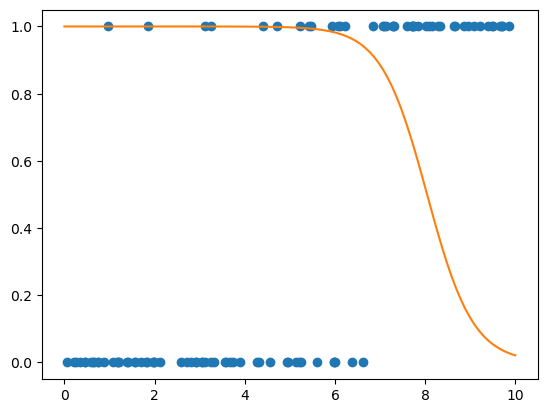

In [9]:
for epoch in range(0,500):
    dw = np.sum(x * (sigmoid(x,w,b) - y)) / 200
    w = w - 0.02 * dw

    db = np.sum((sigmoid(x,w,b) - y)) / 200
    b = b - 0.02 * db

res_1 = (y>sigmoid(x,w,b)) * y

plt.plot(x, res_1,'o',x_vals, sigmoid(x_vals,w,b))

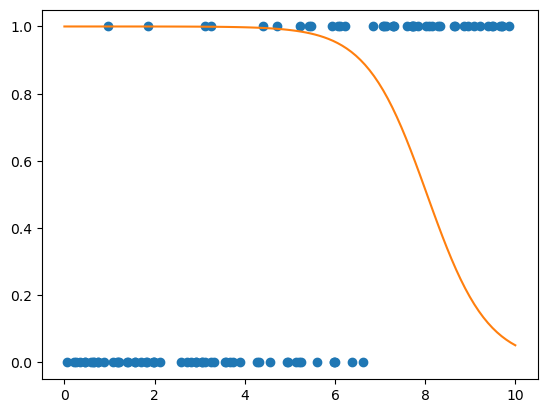

In [10]:
for epoch in range(0,999):
    dw = np.sum(x * (sigmoid(x,w,b) - y)) / 200
    w = w - 0.02 * dw

    db = np.sum((sigmoid(x,w,b) - y)) / 200
    b = b - 0.02 * db

res_1 = (y>sigmoid(x,w,b)) * y

plt.plot(x, res_1,'o',x_vals, sigmoid(x_vals,w,b))

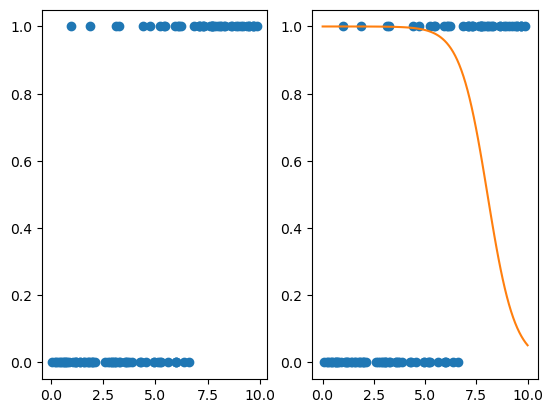

In [11]:
fig, (ax1,ax2) = plt.subplots(1,2)
ax1.plot(x,y,'o')
ax2.plot(x,res_1,'o',x_vals, sigmoid(x_vals,w,b))

This is quite impressive - not only did the algorithm perform quite well, but it also successfully was able to recreate the original data! Using this technique, it was able to learn the parameters that would create a distinction between the 1 and 0 labelled data.